In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans

In [2]:
bank_df = pd.read_csv('../datasets/ric/bank-prep.csv', sep=',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
print(bank_df.shape)
print(bank_df.dtypes)

(6933, 32)
age          int64
default      int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
divorced     int64
married      int64
single       int64
primary      int64
secondary    int64
tertiary     int64
cellular     int64
telephone    int64
unkown       int64
apr          int64
aug          int64
dec          int64
feb          int64
jan          int64
jul          int64
jun          int64
mar          int64
may          int64
nov          int64
oct          int64
sep          int64
dtype: object


## データの正規化

## 範囲変換
正規化後の変数の最小値を０、最大値をとし、値が収まるようにする

In [5]:
bank_df = bank_df.drop('y', axis=1)

mc = MinMaxScaler()
mc.fit(bank_df)

bank_df_mc = pd.DataFrame(mc.transform(bank_df), columns=bank_df.columns)
bank_df_mc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Z変換
正規化後の変数の平均が０、標準偏差が１になるように変換

In [12]:
sc = StandardScaler()
sc.fit(bank_df)

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns=bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [14]:
print(bank_df_sc.mean())
print(bank_df_sc.std())

age         -3.085501e-16
default     -2.955983e-15
balance      8.058845e-17
housing      1.263524e-14
loan        -6.665694e-15
day         -1.745907e-15
duration     5.929837e-17
campaign     4.521945e-15
pdays        2.224701e-14
previous     1.160586e-15
divorced     1.641971e-15
married     -1.653693e-15
single      -1.133763e-15
primary     -2.040037e-15
secondary    2.141291e-15
tertiary     1.623955e-15
cellular     7.350275e-15
telephone    9.604558e-15
unkown      -3.957336e-14
apr         -3.182223e-16
aug         -7.228092e-15
dec          1.448650e-15
feb         -1.088728e-14
jan         -9.445567e-15
jul          1.463856e-14
jun         -6.843317e-15
mar         -2.591381e-15
may          9.057037e-15
nov          6.118989e-15
oct         -1.769291e-14
sep         -6.114746e-15
dtype: float64
age          1.000072
default      1.000072
balance      1.000072
housing      1.000072
loan         1.000072
day          1.000072
duration     1.000072
campaign     1.000072
pda

## 階層型クラスタリング

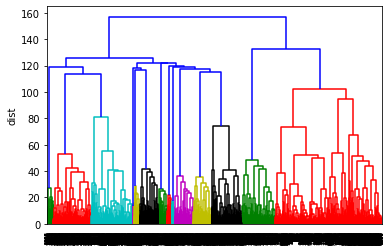

In [16]:
hcls = linkage(bank_df_sc, metric='euclidean', method='ward') #データ間の距離をユークリッド距離で測り、ウォード法でデータ併合を行う
dendrogram(hcls)

plt.ylabel('dist')
plt.show()

In [18]:
cst_group = fcluster(hcls, 100, criterion='distance') #データ間の距離をユークリッド距離で測り、距離の閾値100としてデータをグループへ分割しクラスタIDを付与
print(cst_group)

[14 14 14 ... 12 12 12]


## 非階層型クラスタリング

In [20]:
kcls = KMeans(n_clusters=10) #データを10個に分割するKMeansインスタンスを生成
cst_group = kcls.fit_predict(bank_df_sc)

print(cst_group)

[4 4 4 ... 0 0 0]


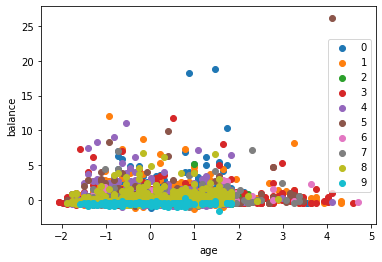

In [22]:
for i in range(10):
    labels = bank_df_sc[cst_group == i]
    plt.scatter(labels['age'], labels['balance'], label=i)

plt.legend()
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [24]:
bank_df_sc['group'] = cst_group
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073,4


In [25]:
print(bank_df_sc['group'].value_counts())

1    1943
4    1679
8     734
3     679
0     631
7     457
5     428
2     185
9     128
6      69
Name: group, dtype: int64


In [26]:
bank_df_sc[bank_df_sc['group']==0].describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,group
count,631.000000,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,...,6.310000e+02,6.310000e+02,631.000000,6.310000e+02,6.310000e+02,6.310000e+02,631.000000,6.310000e+02,6.310000e+02,631.0
mean,0.149085,-1.371485e-01,0.464508,-0.005674,0.054991,0.335166,-0.027180,-0.251140,0.009843,0.089696,...,-2.678184e-01,-1.674064e-01,-0.430395,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.116857,-1.349488e-01,-1.120725e-01,0.0
std,0.918800,3.055535e-16,1.615467,1.001526,1.047842,0.431577,0.988358,0.462147,0.723233,0.846754,...,2.777760e-16,1.138881e-15,0.108879,4.833302e-15,1.124993e-15,5.555519e-15,0.137047,9.444382e-16,3.749975e-16,0.0
min,-1.964393,-1.371485e-01,-1.063086,-1.140627,-0.444540,-1.637382,-0.957063,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,-0.320275,-1.349488e-01,-1.120725e-01,0.0
25%,-0.633545,-1.371485e-01,-0.340957,-1.140627,-0.444540,0.293287,-0.619746,-0.574193,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
50%,0.031879,-1.371485e-01,-0.056838,0.876711,-0.444540,0.413954,-0.356975,-0.238367,-0.418664,-0.310149,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
75%,0.887424,-1.371485e-01,0.697277,0.876711,-0.444540,0.534620,0.233795,-0.238367,0.545464,0.232436,...,-2.678184e-01,-1.674064e-01,-0.434730,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
max,3.549119,-1.371485e-01,18.785751,0.876711,2.249514,1.741289,7.160898,2.448242,4.170989,6.200873,...,-2.678184e-01,-1.674064e-01,2.300280,-3.516573e-01,-1.002619e-01,-6.621040e-01,3.122313,-1.349488e-01,-1.120725e-01,0.0
